<a href="https://colab.research.google.com/github/FUHannes/Deep-Learning/blob/main/Exercise2/Exercise2Hannes_keras_whack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(20000, 1, 28, 28) float32
(20000,) int64
(2000, 1, 28, 28) float32


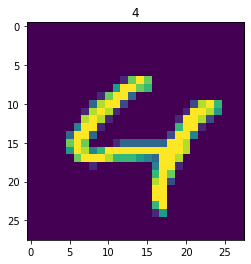

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

with np.load('prediction-challenge-01-data.npz') as fh:
    data_x = fh['data_x']
    data_y = fh['data_y']
    test_x = fh['test_x']

# TRAINING DATA: INPUT (x) AND OUTPUT (y)
# 1. INDEX: IMAGE SERIAL NUMBER
# 2. INDEX: COLOR CHANNEL
# 3/4. INDEX: PIXEL VALUE
print(data_x.shape, data_x.dtype)
print(data_y.shape, data_y.dtype)

# TEST DATA: INPUT (x) ONLY
print(test_x_.shape, test_x_.dtype)

index_to_show = 3
plt.imshow(data_x_[index_to_show, 0])
plt.title(data_y[index_to_show])
plt.show()

In [ ]:

# use keras and tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as l

In [ ]:
input_shape = data_x.shape[1:]
# Normalizing the RGB codes by dividing it to the max RGB value.
data_x /= 255
test_x /= 255


In [ ]:
# heavily inspired by https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
model = Sequential()
model.add(l.Reshape((28,28,1), input_shape=input_shape)) # to have a correct shape
model.add(l.Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(l.Flatten())                          #Flattening the 2D arrays for fully connected layers
model.add(l.Dense(128, activation=tf.nn.relu))  
model.add(l.Dropout(0.2))                       #prevent overfitting
model.add(l.Dense(10,activation=tf.nn.softmax)) #the 10 digits


In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=data_x,y=data_y, epochs=10) 

Epoch 1/10
625/625 [==============================] - 19s 29ms/step - loss: 0.1033 - accuracy: 0.9672
Epoch 2/10
625/625 [==============================] - 18s 29ms/step - loss: 0.0713 - accuracy: 0.9776
Epoch 3/10
625/625 [==============================] - 18s 29ms/step - loss: 0.0643 - accuracy: 0.9803
Epoch 4/10
625/625 [==============================] - 18s 29ms/step - loss: 0.0547 - accuracy: 0.9820
Epoch 5/10
625/625 [==============================] - 18s 29ms/step - loss: 0.0421 - accuracy: 0.9862
Epoch 6/10
625/625 [==============================] - 18s 29ms/step - loss: 0.0370 - accuracy: 0.9874
Epoch 7/10
625/625 [==============================] - 18s 29ms/step - loss: 0.0435 - accuracy: 0.9867
Epoch 8/10
625/625 [==============================] - 18s 29ms/step - loss: 0.0286 - accuracy: 0.9899
Epoch 9/10
625/625 [==============================] - 18s 29ms/step - loss: 0.0364 - accuracy: 0.9867
Epoch 10/10
625/625 [==============================] - 18s 29ms/step - loss: 0.029

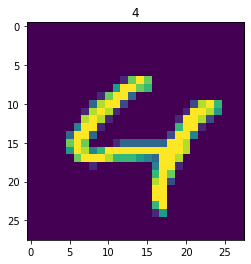

In [ ]:
plt.imshow(data_x[index_to_show,0])
plt.title(model.predict(data_x[index_to_show].reshape(1,1,28,28)).argmax())
plt.show()

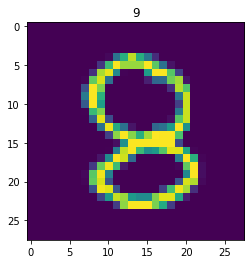

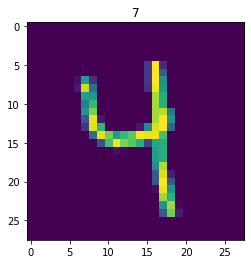

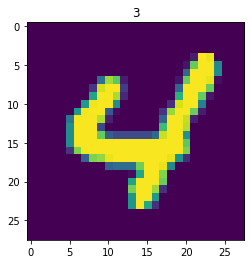

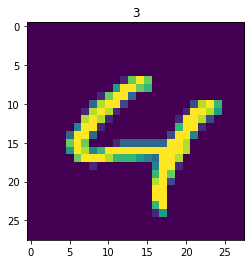

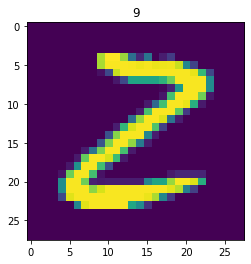

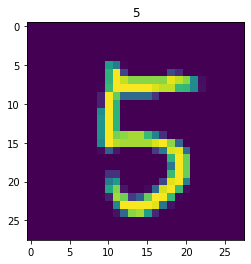

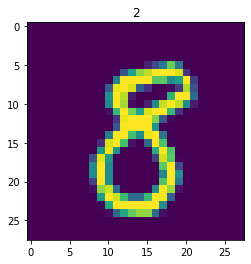

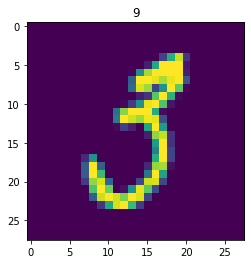

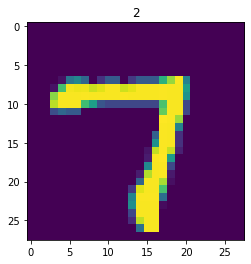

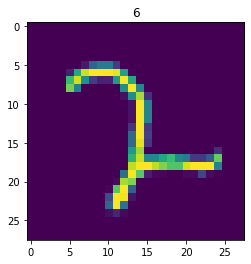

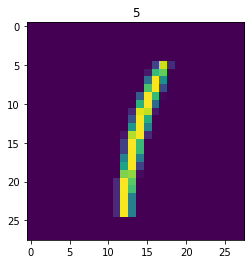

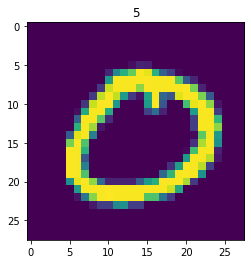

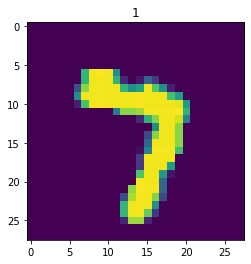

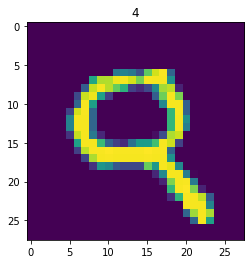

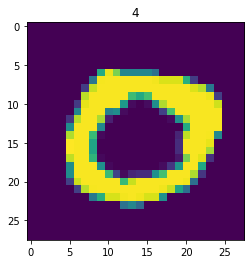

In [ ]:
indices = range(15)
preds = model.predict(test_x[indices]).argmax(axis=1)
for i in indices:
  plt.imshow(data_x[i,0])
  plt.title(preds[i])
  plt.show()

In [ ]:
import numpy as np

prediction = # THAT'S YOUR JOB

# MAKE SURE THAT YOU HAVE THE RIGHT FORMAT
assert prediction.ndim == 1
assert prediction.shape[0] == 2000

# AND SAVE EXACTLY AS SHOWN BELOW
np.save('prediction.npy', prediction)
